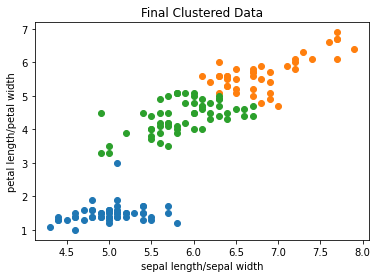

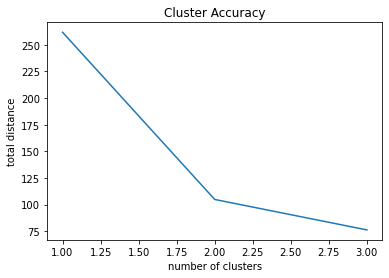

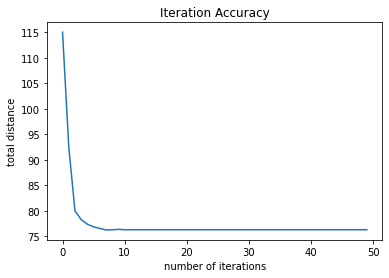

In [485]:
import numpy as np
import scipy as sp
from sklearn import datasets
from matplotlib import pyplot as plt
from random import randrange
import pandas as pd
from scipy.spatial.distance import cdist 
import matplotlib as mpl
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target
data = X[:,[0, 2]]
for i in range(0, len(X)):
    X[i][0] = (X[i][0]/X[i][1])
    X[i][2] = (X[i][2]/X[i][3])
    

'''
plt.scatter(data[:,0], data[:,1], c=y)
plt.show()
'''


def k_init(X, k):
    """ k-means++: initialization algorithm

    Parameters
    ----------
    X: array, shape(n ,d)
        Input array of n samples and d features

    k: int
        The number of clusters

    Returns
    -------
    init_centers: array (k, d)
        The initialize centers for kmeans++
    """
    x = randrange(len(X)-1)
    initial_centroid = [X[x][0],X[x][1]]

    final_centroids = [initial_centroid]
    for i in range(k):
        distance = []
        for j in range(len(X)):
            temp_distances = []
            
            for centroid in final_centroids:
                temp_dist = np.sqrt((X[j][1]-centroid[1])**2+(X[j][0]-centroid[0])**2)
                temp_distances.append(temp_dist)

            min_distance = min(temp_distances)
            distance.append([j,min_distance])
            

        total_dist = sum(n for _, n in distance)
        probabilities = []
        index = []
        for idx,dist in distance:
            index.append(idx)
            probabilities.append(dist/total_dist)
            
        new_centroid_index = np.random.choice(index,p=probabilities)
        final_centroids.append(list(X[new_centroid_index]))
        
    return final_centroids[1:]
        
        


def k_means_pp(X, k, max_iter):
    """ k-means++ clustering algorithm

    step 1: call k_init() to initialize the centers
    step 2: iteratively refine the assignments

    Parameters
    ----------
    X: array, shape(n ,d)
        Input array of n samples and d features

    k: int
        The number of clusters

    max_iter: int
        Maximum number of iteration

    Returns
    -------
    final_centers: array, shape (k, d)
        The final cluster centers
    """
    centroids = k_init(X, k)
    objective_points = []
    distances = cdist(X, centroids ,'euclidean')
    points = np.array([np.argmin(i) for i in distances])

    #Re-compute centroids
    for i in range(max_iter): 
        temp_objective = 0
        cluster_plot = []
        centroids = []
        for j in range(k):
            new_centroid = X[points==j].mean(axis=0) 
            centroids.append(new_centroid)
        
        #Compute objective of new centroid in current iteration
        points = assign_data2clusters(X, centroids)
        mapping = [(points[l], list(data[l])) for l in range(len(points))]
        for j in range(len(centroids)):
            temp_store = []
            for m in mapping:
                if m[0] == j:
                    temp_store.append(m[1])
            objective = compute_objective(temp_store,centroids[j])
            temp_objective += objective
            cluster_plot.append(temp_store)
        objective_points.append((i,temp_objective))
        
    return centroids,cluster_plot,objective_points


def assign_data2clusters(X, C):
    """ Assignments of data to the clusters
    Parameters
    ----------
    X: array, shape(n ,d)
        Input array of n samples and d features

    C: array, shape(k ,d)
        The final cluster centers

    Returns
    -------
    data_map: array, shape(n, k)
        The binary matrix A which shows the assignments of data points (X) to
        the input centers (C).
    """
    #assign data points to closest centroid
    centroids = np.vstack(C)
    distances = cdist(X, C ,'euclidean')
    assignments = np.array([np.argmin(i) for i in distances])
    return assignments

def compute_objective(X, C):
    """ Compute the clustering objective for X and C
    Parameters
    ----------
    X: array, shape(n ,d)
        Input array of n samples and d features

    C: array, shape(k ,d)
        The final cluster centers

    Returns
    -------
    accuracy: float
        The objective for the given assigments
    """
    #Compute sum of distances in a cluster
    objective = 0
    for i in range(len(X)):
        dist = np.sqrt((X[i][1]-C[1])**2+(X[i][0]-C[0])**2)
        objective+=dist
    return objective
    

#Ignore function below - Used for testing graphs

def graph_clusters(data,num_clusters,max_iter):
    cluster_dist_plot = []
    
    #get the plot points for iterating over num_clusters
    iteration = 1
    while iteration <= num_clusters:
        centroids,cluster_plot,objective_points = k_means_pp(data, iteration, max_iter)
        cluster_dist_plot.append((iteration,objective_points[-1][1]))
        iteration+=1
        
    #Plot final KMeans++ clusterd points
    for cluster in cluster_plot:
        x, y = zip(*cluster)
        plt.scatter(x, y)
    plt.title("Final Clustered Data")
    plt.xlabel("sepal length/sepal width")
    plt.ylabel("petal length/petal width")
    plt.show()
    
    #Plot the iteration K function
    x, y = zip(*cluster_dist_plot)
    plt.plot(x, y)
    plt.title("Cluster Accuracy")
    plt.xlabel("number of clusters")
    plt.ylabel("total distance")
    plt.show()
    
    #Plot iteration objective function
    x, y = zip(*objective_points)
    plt.plot(x, y)
    plt.title("Iteration Accuracy")
    plt.xlabel("number of iterations")
    plt.ylabel("total distance")
    plt.show()
    

#First input is data
#Second input is #of clusters
#Third input is number of iterations
graph_clusters(data, 3, 50)